### Table of Contents 

Introduction 

1. Exploratory Data Analysis
    * Banking crisis 
    * Systemic crisis
    * Currency crisis
    * Inflation crisis
    * Exchange rate 
    * Inflation 
    * Independence
    * Sovereign domestic and external debt
    * Correlation and heatmap
2. Data Preprocessing 
    * Missing values 
    * Duplicate/ Unnecessary features
    * Categorical features to numerical forms
    * Split into Training and Testing dataset
3. Machine Learning Models + Evaluation
    * Logistic regression
    * Support Vector Machine
    * K-Nearest Neighbor & tuning
    * Decision Tree
    * Random Forrest
    * Neural Network & metrics 
4. Conclusion
    * Top 5 important features
    * The best model 

## Introduction

The aim is to analyze factors most associated banking crises in 13 African countries from 1960 to 2014. We will also build various machine learning models to predict a banking crisis.

## 1. EXPLORATORY DATA ANALYSIS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve, confusion_matrix, auc



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory'';
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
df = pd.read_csv("/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv")

In [3]:
#Always have a copy of the orginal dataframe
df_copy1= df.copy()

#Show few samples
df.sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
849,63,TUN,Tunisia,1967,0,5.200000e-01,0,0,0.0,2.843700,1,0,0,no_crisis
823,63,TUN,Tunisia,1941,0,4.493700e+01,0,0,0.0,24.582032,0,0,1,no_crisis
1047,70,ZWE,Zimbabwe,2002,1,5.500000e-25,1,1,0.0,198.928606,1,0,1,crisis
749,56,ZAF,South Africa,1941,0,2.512500e-01,0,0,0.0,6.028520,1,0,0,no_crisis
401,19,EGY,Egypt,1978,0,3.913000e-01,0,0,0.0,11.270872,1,0,0,no_crisis


In [4]:
#Get a glance at columns and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
#More info about the dataframe and data
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


You may have noticed that the majority of columns are binary (Min = 0 and Max=1).
The std of inflation_annual_cpi  is a big number : 6.757274e+05. It suggests a great spread of inflation rates. 

In [6]:
#Define function to return feature information
#create a dictionary {column name : column info}

feature_dict={ 
        'case':"A number which denotes a specific country", 
        'cc3': "A 3-letter country code", 
        'country':"The name of the country", 
        'year':"The year of the observation", 
        'systemic_crisis':" '0' means that no currency crisis  and '1' means that a currency crisis occurred in the year", 
        'exch_usd':"The exchange rate of the country vis-a-vis the USD",
       'domestic_debt_in_default':" '0' means that no sovereign domestic debt  and '1' means that a sovereign domestic debt occurred in the year", 
       'sovereign_external_debt_default':" '0' means that no sovereign external debt  and '1' means that a sovereign external debt occurred in the year",
       'gdp_weighted_default':"The total debt in default vis-a-vis the GDP", 
       'inflation_annual_cpi':"The annual CPI inflation rate", 
       'independence' :" '0' means no independence and '1' means independence",
       'currency_crises':  " '0' means that no currency crisis  and '1' means that an currency crisis occurred in the year", 
       'inflation_crises': " '0' means that no inflation crisis  and '1' means that an inflation crisis occurred in the year", 
       'banking_crisis':" 'no_crisis' means that no banking crisis  and 'crisis' means that a banking crisis occurred in the year"
        
        }
#Define a function that returns column information given column name
def feature_info(text):
    if (feature_dict.get(text)):
        return feature_dict[text]
    else:
        print(text,"column does not exist.Check the spelling")

### Banking crisis

Banking crises occur when there are widespread bank runs: an abnormal number depositors try to withdraw their deposits because they don't trust that the bank will have the deposits for withdrawal in the future. Banking crises are not a new economic phenomenon, and similarly are not the only source of financial crises.[1]

In [7]:
feature_info('banking_crisis')

" 'no_crisis' means that no banking crisis  and 'crisis' means that a banking crisis occurred in the year"

##### Number of banking crisis 

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

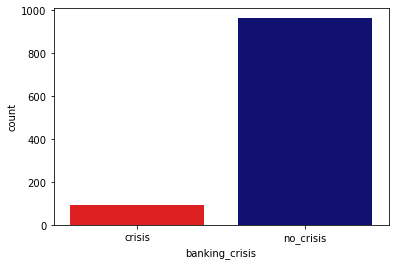

In [8]:
#plot the numbers 
sns.countplot(x='banking_crisis',data=df,palette=['red','navy'])
#to get the exact number.Run the line below
df['banking_crisis'].value_counts()

We have more than 900 columns of no_crisis and 94 columns of crisis.
Considering banking crisis as our target column (y), we clearly have imbalance numbers for training predictive models.

##### Banking crisis per country 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

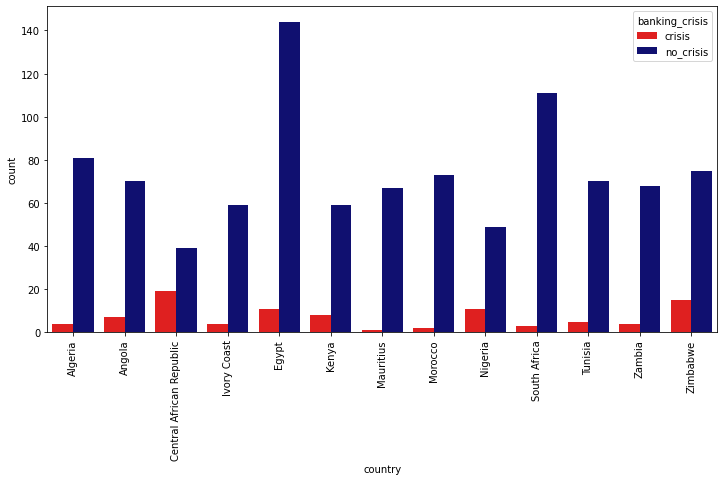

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='banking_crisis', data=df,palette=['red','navy'])
plt.xticks(rotation=90)

Central African Republic (CAR) followed by Zimbabwe have the highest numbers of banking crises.Mauritius has the least.
The above graph shows also that some countries like Egpyt and South Africa have more data/rows than other countries like Nigeria & CAR.

##### Banking crisis per country (ordered)


In [10]:
#Get  countries and no of banking_Crisis
nbcrisis=df.query("banking_crisis == 'crisis'")['country'].value_counts()
nbcrisis

Central African Republic    19
Zimbabwe                    15
Nigeria                     11
Egypt                       11
Kenya                        8
Angola                       7
Tunisia                      5
Zambia                       4
Algeria                      4
Ivory Coast                  4
South Africa                 3
Morocco                      2
Mauritius                    1
Name: country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

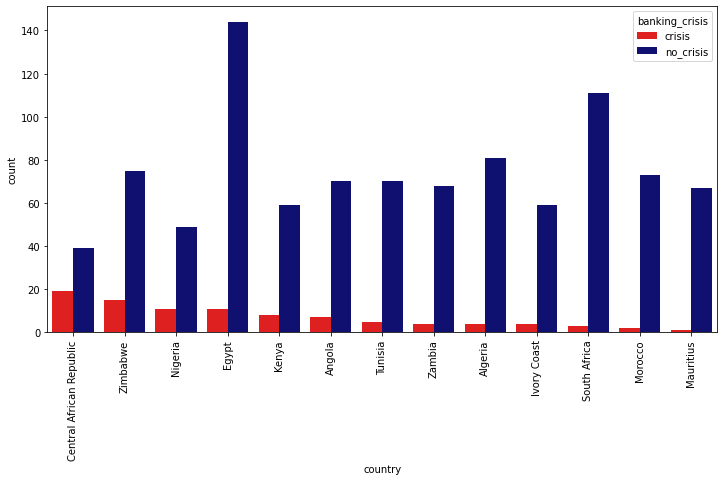

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='banking_crisis',order=nbcrisis.index, data=df,palette=['red','navy'])
plt.xticks(rotation=90)

### Systemic crises

A systemic crisis is a domino effect in which a financial trouble spreads between institutions and markets until it affects the whole monetary and financial system with dire global economic consequences.[2]

##### Systemic crisis per country 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

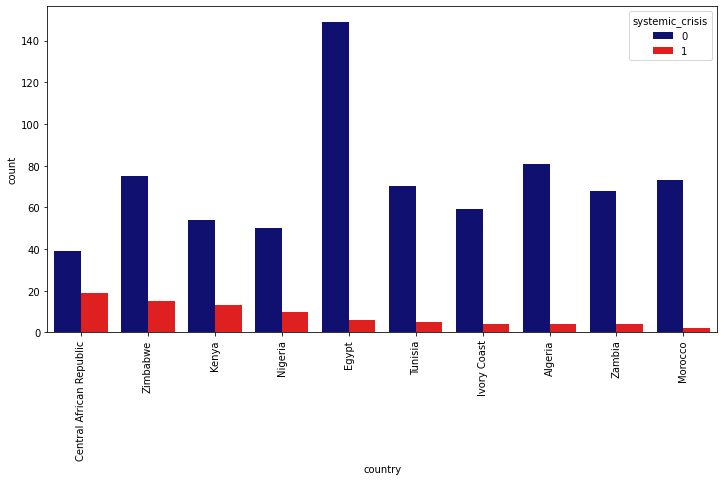

In [12]:
#Order by no of crisis
nscrisis=df.query("systemic_crisis == 1")['country'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(x='country',hue='systemic_crisis',order=nscrisis.index ,data=df,palette=['navy','red'])
plt.xticks(rotation=90)

CAR and Zimbabwe again have the highest numbers of systemic crises. Notice that Angola , South Africa and Mauritius labels are missing. It is because they have 0 systemic crises.

### Currency crises

A currency crisis is a situation in which serious doubt exists as to whether a country's central bank has sufficient foreign exchange reserves to maintain the country's fixed exchange rate. The crisis is often accompanied by a speculative attack in the foreign exchange market. [3]

In [13]:
#To get feature information 
feature_info('currency_crises')

" '0' means that no currency crisis  and '1' means that an currency crisis occurred in the year"

##### Currency crises per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

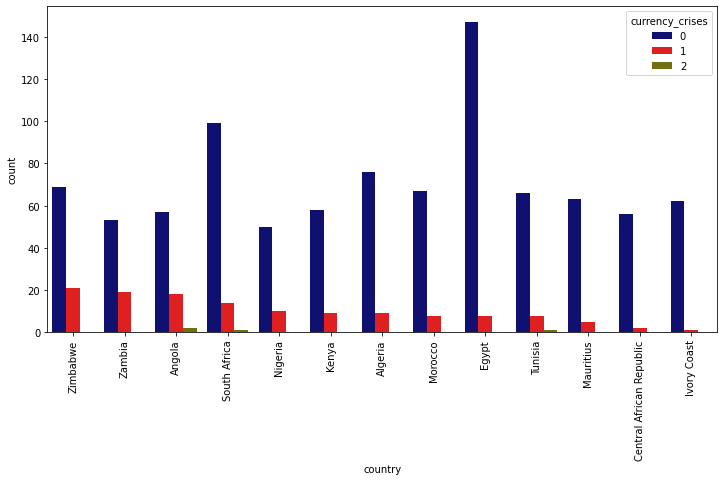

In [14]:
#Order by no of crisis
nccrisis=df.query("currency_crises == 1")['country'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(x='country',hue='currency_crises',order=nccrisis.index ,data=df,palette=['navy','red','olive'])
plt.xticks(rotation=90)

What is the meaning of '2' (olive color in the graph)? Let's suppose it was a mistake and ignore it for now. We might need to decide what to do with those rows (with value 2) in data preprocessing section.

### Inflation crises

To understand inflation and cpi, please read [4].

In [15]:
#To get feature information 
feature_info('inflation_crises')

" '0' means that no inflation crisis  and '1' means that an inflation crisis occurred in the year"

##### Inflation crisis per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

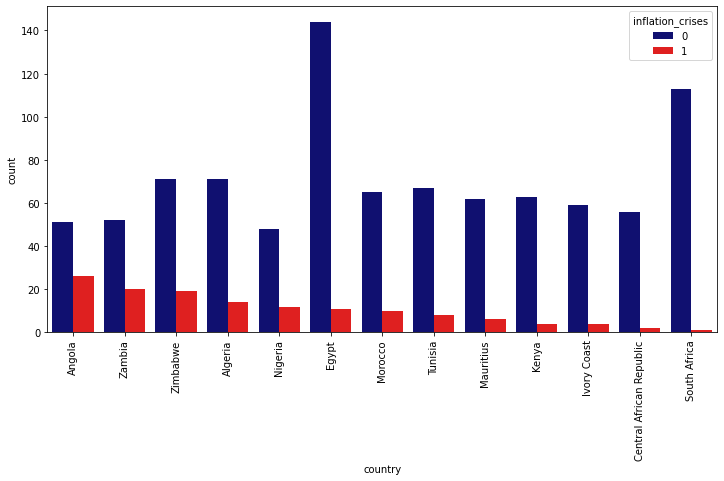

In [16]:
#Order by no of crisis
nicrisis=df.query("inflation_crises == 1")['country'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(x='country',hue='inflation_crises',order=nicrisis.index ,data=df, palette=['navy','red'])
plt.xticks(rotation=90)

Angola, Zambia and Zimbabwe are on top in terms of inflation crises. South Africa has had the least no of inflation crises.

### Exchange rate 

In [17]:
#To get feature information 
feature_info('exch_usd')

'The exchange rate of the country vis-a-vis the USD'

#### Distribution of exchange rates per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

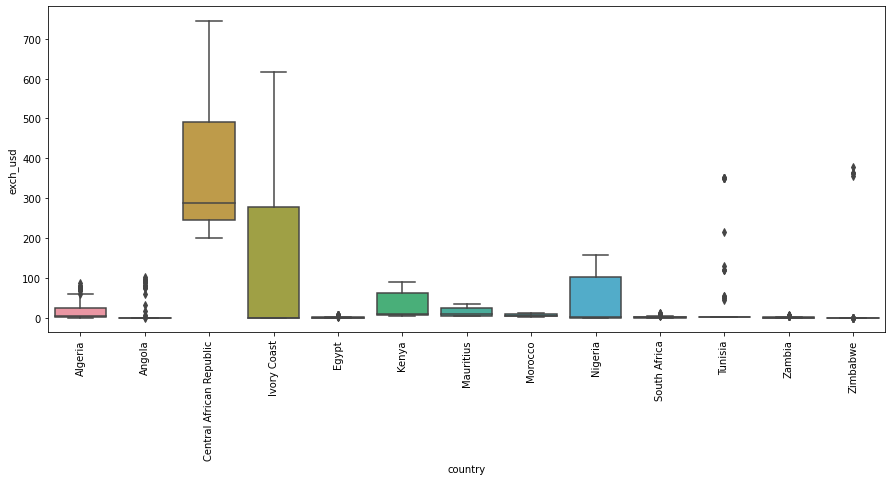

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x='country', y='exch_usd', data=df[['country','exch_usd','banking_crisis']])
plt.xticks(rotation=90)

This boxplot reveals some intereting differences in echange rates.The minimum exchange rate of CAR is greater than the maximun exchange rate of 75% of other countries. Egypt, Morocco's distribution is the lowest suggesting a low and stable exchange rate. Zimbabwe, Tunisia and Angola have the most outliers which suggests very high inflation rates or even hyperinflations.
Except from CAR, the rest have a median close to zero which suggests either they have a good portion of very low exchange rate or simply they have many zeros in this column. We will analyze time-series to find out.

#### Average exchange rate per country 

In [19]:
df.groupby('country')['exch_usd'].mean().sort_values()

country
Egypt                         1.006045
Zambia                        1.116342
South Africa                  1.719339
Morocco                       5.865309
Mauritius                    13.759661
Angola                       15.099671
Algeria                      20.177565
Zimbabwe                     20.207800
Kenya                        30.713180
Nigeria                      38.951022
Tunisia                      50.692807
Ivory Coast                 153.320635
Central African Republic    367.686066
Name: exch_usd, dtype: float64

##### Effect of banking_crisis on exchange rate 

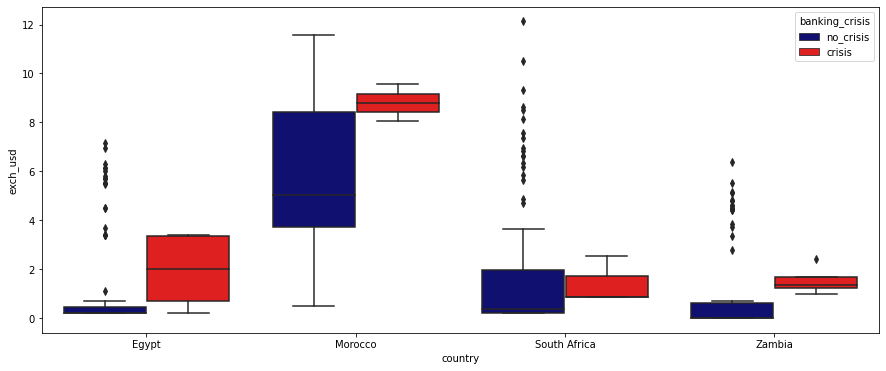

In [20]:
#For low rate countries
plt.figure(figsize=(15,6))                                                 
sns.boxplot(x='country', y='exch_usd', data=df.query(" country in ['Egypt','Zambia','South Africa','Morocco'] ")[['country','exch_usd','banking_crisis']],hue='banking_crisis',palette=['navy','red'])

Banking crises raise exchange rates in countries with rates less than 12 vis-a-vis the USD. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

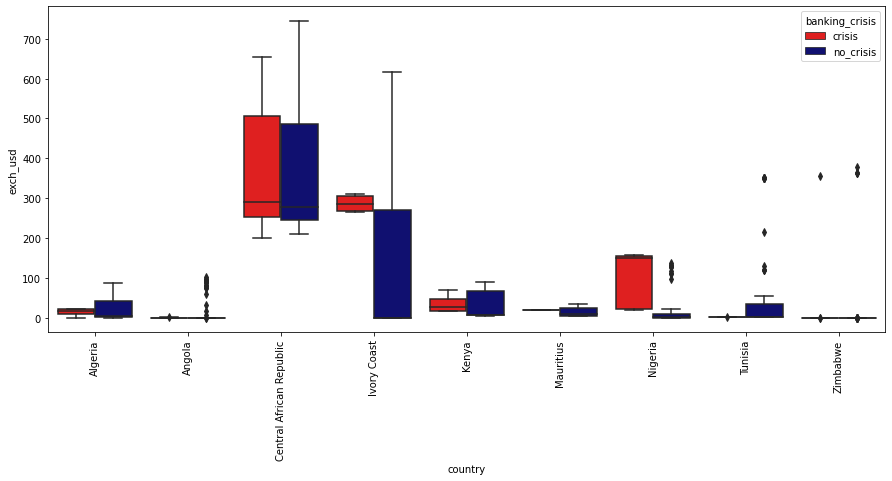

In [21]:
#For the rest 
plt.figure(figsize=(15,6))                                                 
sns.boxplot(x='country', y='exch_usd', data=df.query(" country not in ['Egypt','Zambia','South Africa','Morocco'] ")[['country','exch_usd','banking_crisis']],hue='banking_crisis', palette=['red','navy',])
plt.xticks(rotation=90)

Except for Ivory Coast and Nigeria ,exchange rate during banking crises are almost similar or lower to rates in no crisis time. Countries like Zimbabwe and Angola have too many zeros in this feature. The median of IC is almost zero which suggests a chunck of zeros. Missing information?

##### Exchange rate timeplot

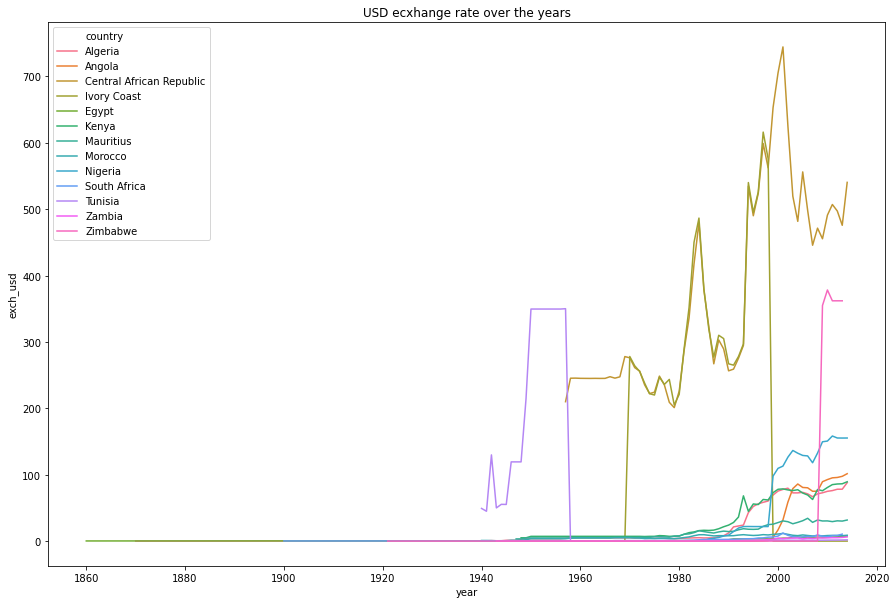

In [22]:
plt.figure(figsize=(15,10))
plt.title('USD ecxhange rate over the years')
sns.lineplot(x='year',y='exch_usd',data=df[['country','year','exch_usd']],hue='country')


It is not easy to analyze the above graph because of the number of lines and the difference in exchange  rates.To cure this problem, we can plot 2 or 3 countries with similar exchange rates together or we can use plotly. I have chosen plotly because of its interactive nature and ability to add/substract a particular country with just a click.

##### Exchange rate per country using plotly

In [23]:
#Play with labels to see individual figures
fig = go.Figure()
for country, details in df.groupby('country'):
    fig.add_scatter(x=details.year,y=details.exch_usd,name=country,mode='lines')

iplot(fig)

You can isolate and analyze each country by clicking/double-clicking the label on the right side of the graph. NOTE : If you analysed each figure individually, you will find out that some figures are odd in terms of exchange rate progression. Example: extended period of zero rate for some countries.  It might be because many of these countries have had to change currencies.

### Inflation_annual_cpi

The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living. The CPI is one of the most frequently used statistics for identifying periods of inflation or deflation.[4]
I will call this feature : inflation rate !

In [24]:
feature_info('inflation_annual_cpi')

'The annual CPI inflation rate'

##### Inflation rate 's timeline (per country)

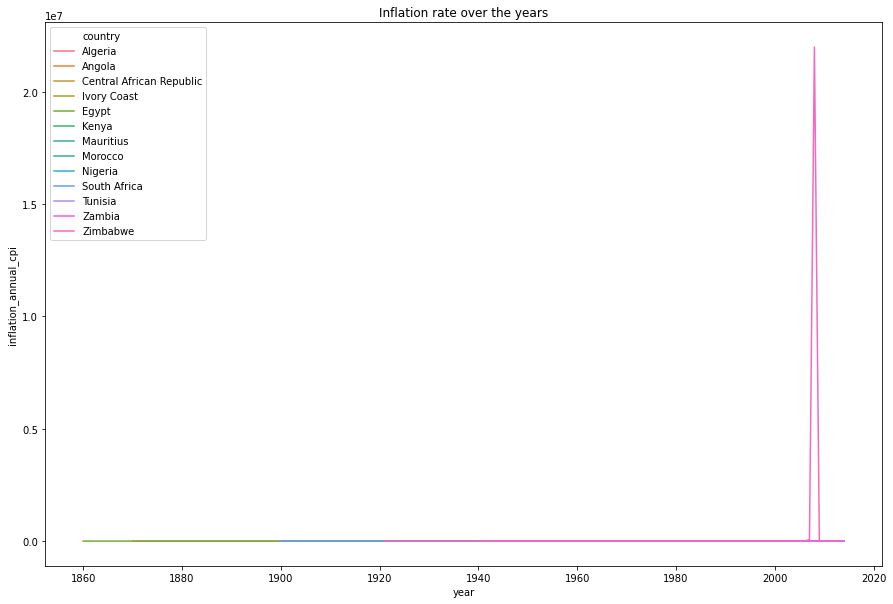

In [25]:
plt.figure(figsize=(15,10))
plt.title('Inflation rate over the years')
sns.lineplot(x='year',y='inflation_annual_cpi',data=df[['country','year','inflation_annual_cpi']],hue='country')

It looks Zimbabwe has some abnormal values in this feature (Remember when we noticed it at the beginning using describe() method?). We will need to isolate it .
Let us find the average inflation rate of each country.

In [26]:
#Average inflation per country
df.groupby('country')['inflation_annual_cpi'].mean().sort_values(ascending=False)

country
Zimbabwe                    245105.559428
Angola                         152.090470
Zambia                          21.997512
Nigeria                         14.766862
Algeria                          9.920998
Tunisia                          9.291669
Kenya                            8.725192
Morocco                          8.680358
Mauritius                        6.854715
Ivory Coast                      6.109254
Central African Republic         5.849863
South Africa                     5.190383
Egypt                            4.762431
Name: inflation_annual_cpi, dtype: float64

Zimbabwe's inflation rate is way too high when compared with the rest. You can google to know more about the hyper-inflation that occured in Zimbabwe. Angola has got a fairly high inflation rate as well followed by Zambia. We might need to isolate Zim and Angola when analyzing this feature.

##### Inflation rate over the years 

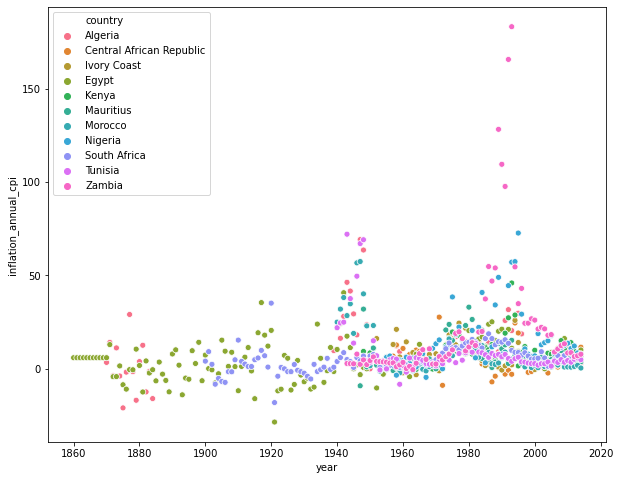

In [27]:
#Remove countries with high inflation rate like Zimbabwe and Angola
plt.figure(figsize=(10,8))
sns.scatterplot(x='year',y='inflation_annual_cpi',data=df_copy1.query("country not in ['Zimbabwe','Angola'] "), hue='country')

Inflation rate pattern ranged from an average -10 to 10 % before 1940. The pattern rises up somewhere between 1940 to 1949, reaching above 70% in countries like morocco, algeria and tunisia before coming down under 15% in the 50's. The inflation was stabilized in the 60's with many countries under 15% before rising slightly at the outskirts of the 80's.Countries like Zambia and Nigeria underwent a high inflation rate in the 90's. After 2000, the overall inflation rate pattern came under 12%.

##### Inflation rate over the years (using Plotly)

In [28]:
import plotly.express as px

subset_df=df.query("country not in ['Zimbabwe','Angola']")
#Replace subset_df by df if you want to include Zim and Angola
fig=px.scatter(subset_df,x='year',y='inflation_annual_cpi',color="country") 
fig.show()


From 1950, the inflation rate show some similar patterns. From 1950 to 1970,the average inflation rate was below 8.It raised from 1970 to 1975 ,then dropped below 15 after the 80's. It raised again in the 90's with countries like Zambia and Nigeria experiencing very high inflation before dropping below 10 for the majority after 2000.

##### Inflation timeplot using Plotly

In [29]:
#Use plotly for interactive graphs
#Click on label of Zim, Angola to remove them from the interactive graph
fig = go.Figure()
#To remove Zim and Angola from the dataset
#subset_df=df.query("country not in ['Zimbabwe','Angola']")

for country, details in df.groupby('country'):   #replace df by subset_df if you wanna remove Zim and Ang
    fig.add_scatter(x=details.year,y=details.inflation_annual_cpi,name=country,mode='lines')
iplot(fig)

We got data about Egypt's inflation from 1860 , Algeria from 1870 followed by South Africa in 1900 and Zimbabwe around 1920. The remaining countries got data only after 1940.

### Independence 

The majority of African countries were colonized by western countries.It was not after the 50's that many  started obtaining independence. Did countries experience more crises after independence? 

In [30]:
feature_info("independence")

" '0' means no independence and '1' means independence"

We will need a good balance of data before and after independence to show the effect of independence in  various crisis , inflation and exchange rates ?

##### Compare data amount before and after independence

In [31]:
#Build a df to compare data before and after independence
df_independence=df.query('independence==1').groupby('country')['year'].min()   #Get independence year for each country
df_min_year=df.groupby('country')['year'].min()                                #Get the min year
df_count_no_ind=df[df['independence']==0].groupby('country')['independence'].count() #No independence data
df_count_ind=df[df['independence']==1].groupby('country')['independence'].count()    #independence data
#concat all 4 dfs
df_compare = pd.concat([df_min_year,df_independence,df_count_no_ind,df_count_ind],axis=1)
df_compare.columns=['Min_year','Ind_year','Data_Ind_0','Data_Ind_1']
#sort by Data_Ind_O to get countries with considerable data before independence
df_compare.sort_values(by='Data_Ind_0',ascending=False)

,Min_year,Ind_year,Data_Ind_0,Data_Ind_1
Angola,1921,1975,47.0,30
Zimbabwe,1921,1965,41.0,49
Algeria,1870,1968,38.0,47
Zambia,1943,1964,21.0,51
Mauritius,1947,1963,16.0,52
Morocco,1940,1956,16.0,59
Tunisia,1940,1956,16.0,59
Kenya,1948,1963,15.0,52
South Africa,1900,1910,10.0,104
Ivory Coast,1952,1960,8.0,55


Analysing the table above, we have more data after independence than before independence except for Angola.However, we should be able to compare crises before and after independence! 

##### Effect of independence 

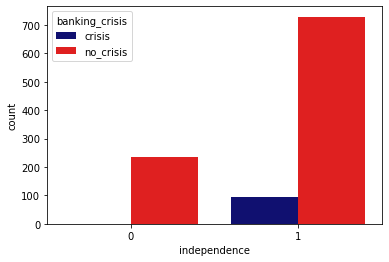

In [32]:
#In banking crisis
sns.countplot(x='independence',data=df,hue='banking_crisis',palette=['navy','red'])

0 crisis before the independence!! Approx 90-100 crises after the independence.

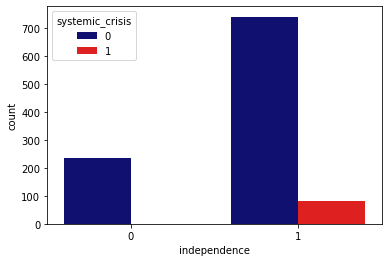

In [33]:
#Systemic crisis
sns.countplot(x='independence',data=df,hue='systemic_crisis',palette=['navy','red'])

0 crisis before independence and more than 80 systemic crises after.

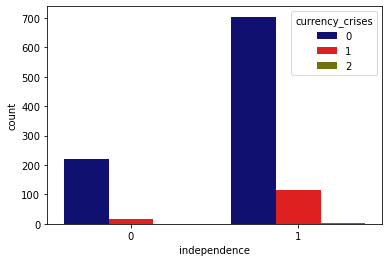

In [34]:
#Currency crisis
sns.countplot(x='independence',data=df,hue='currency_crises',palette=['navy','red','olive'])


After independence, the no of crises were more than 10 times the no before independence.

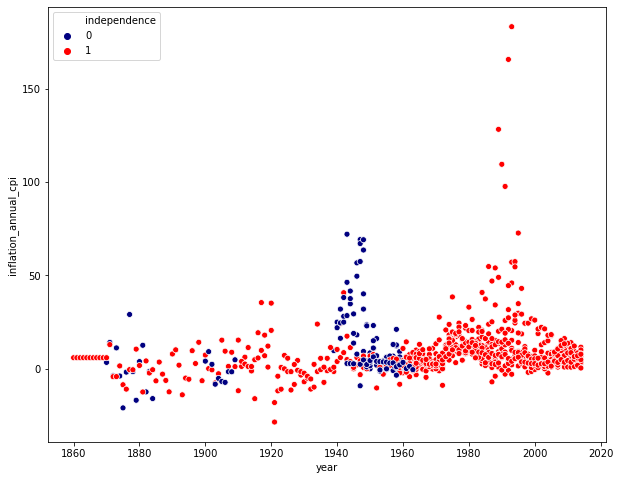

In [35]:
#Inflation
#Remove countries with high inflation rate like Zimbabwe and Angola
plt.figure(figsize=(10,8))
sns.scatterplot(x='year',y='inflation_annual_cpi',
                data=df.query("country not in ['Zimbabwe','Angola'] "), hue='independence',palette=['navy','red'])

Apart from the turbulent times between 40-50s and the 90s, the overall inflation rate slightly raised after independence.

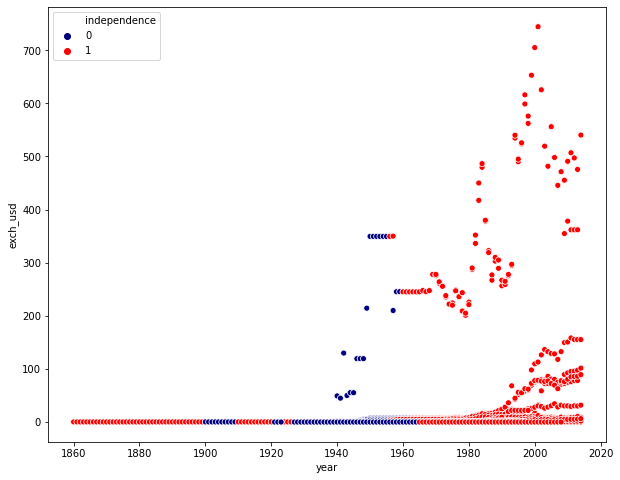

In [36]:
#Exchange rate
plt.figure(figsize=(10,8))
sns.scatterplot(x='year',y='exch_usd',
                data=df, hue='independence',palette=['navy','red'])

Here too, we can see an increase in exchange rate from 1940 to 1960 before independence. After independence, there is a rapid increase in the 80 to 90's. Things got worst for some countries after 2000.

Arguably, independence has negatively influenced the economy of many countries (based on crises features , exchange rate & inflation rates). Argually, we can also say that we do not have much data about countries before independence. Hence, we cannot really be sure about the effect of independence!



### Sovereign dosmetic debt

Internal debt or domestic debt is the part of the total government debt in a country that is owed to lenders within the country. Internal government debt's complement is external government debt. Commercial banks, other financial institutions etc. constitute the sources of funds for the internal debts.[8]


In [37]:
feature_info("domestic_debt_in_default")

" '0' means that no sovereign domestic debt  and '1' means that a sovereign domestic debt occurred in the year"

#####  Number of debts

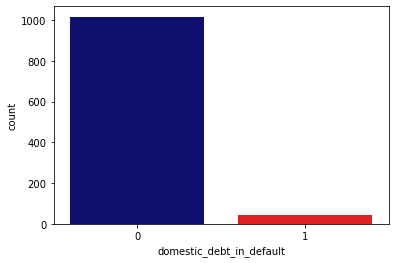

In [38]:
sns.countplot(x='domestic_debt_in_default',data=df, palette=['navy','red'])

Not many countries have had domestic debts.

##### Domestic Debts per country

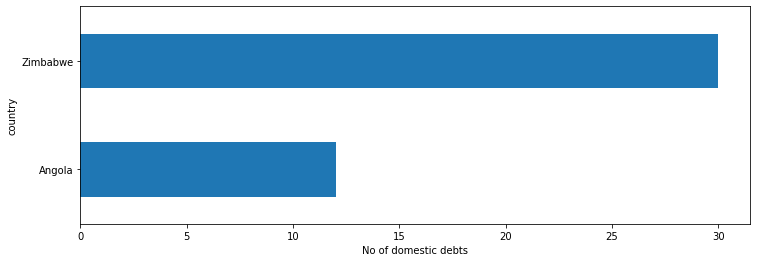

In [39]:
plt.figure(figsize=(12,4))
plt.xlabel('No of domestic debts')
df.query('domestic_debt_in_default == 1').groupby('country')['domestic_debt_in_default'].count().sort_values().plot(kind='barh')

Only 2 countries have had domestic debts : Angola and Zimbabwe.



### Sovereign External debt 
External debt, at any given time, is the outstanding amount of those actual current, and not contingent, liabilities that require payment(s) of interest and/or principal by the debtor at some point(s) in the future and that are owed to nonresidents by residents of an economy.[7]


In [40]:
feature_info("sovereign_external_debt_default")

" '0' means that no sovereign external debt  and '1' means that a sovereign external debt occurred in the year"

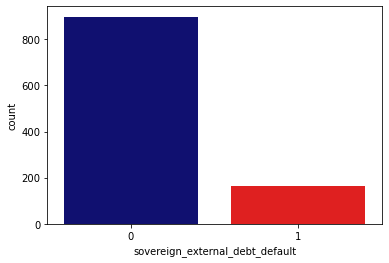

In [41]:
#No of debts 
sns.countplot(x='sovereign_external_debt_default',data=df,palette=['navy','red'])

##### External debts per country

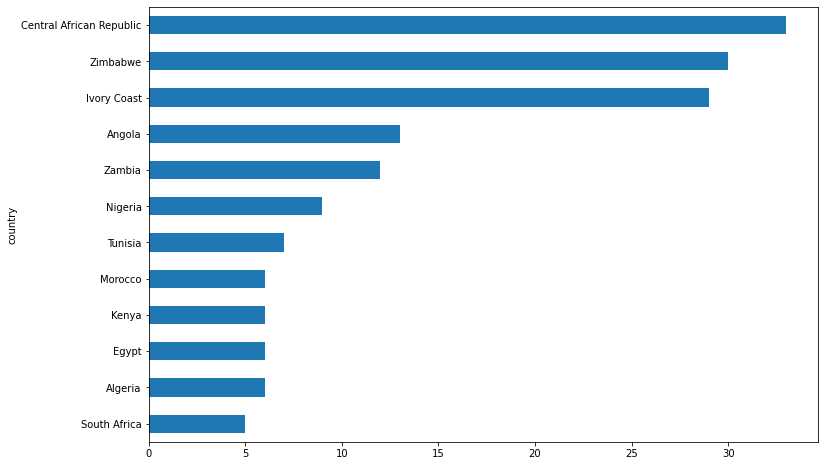

In [42]:
plt.figure(figsize=(12,8))
df.query('sovereign_external_debt_default == 1').groupby('country')['sovereign_external_debt_default'].count().sort_values().plot(kind='barh')

CAR has the highest no of external debts - 33, followed by Zimbabwe with 30. South Africa is the least on the above figure with just 5. Mauritius is not on the list, hence we suppose it has never took any external debt.

### Gdp_weighted

GDP is the monetary value of all finished goods and services made within a country during a specific period. GDP provides an economic snapshot of a country, used to estimate the size of an economy and growth rate. GDP can be calculated in three ways, using expenditures, production, or incomes[4] Public debt is the total amount of money owed by the government to creditors. It is usually presented as a percentage of gross domestic product (GDP).[5]

In our case :'gdp_weighted_default'= Debt/GDP.


In [43]:
feature_info('gdp_weighted_default')

'The total debt in default vis-a-vis the GDP'

##### Gpd_weighted timeplot

In [44]:
#Use plotly for interactive graphs
#Double click on country name to separate it from the rest
fig = go.Figure()
for country, details in df.groupby('country'):
    fig.add_scatter(x=details.year,y=details.gdp_weighted_default,name=country,mode='lines')
iplot(fig)

Egypt 's gdp_weighted is the highest gdp_weighted, reaching 0.4 from 1875 to 1880 and in 1984. 
You may have noticed that a flat 0 gdp_weighted for more than 6 countries.


### Correlation


##### Features' correlation table

In [45]:
df_corr = df.corr()
df_corr

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


The target class is missing because it is not numeric ! we need to transform it into numerical. 

In [46]:
#Add a new column called banking_crisis1 , crisis=1 and no_crisis=0 using lambda expression
df['banking_crisis1']= df.apply(lambda x : 1 if x[-1]=='crisis' else 0, axis=1)
#check both columns
#df.columns
df[['banking_crisis','banking_crisis1']].head(5)

,banking_crisis,banking_crisis1
0,crisis,1
1,no_crisis,0
2,no_crisis,0
3,no_crisis,0
4,no_crisis,0


##### Heatmap to show features'correlation

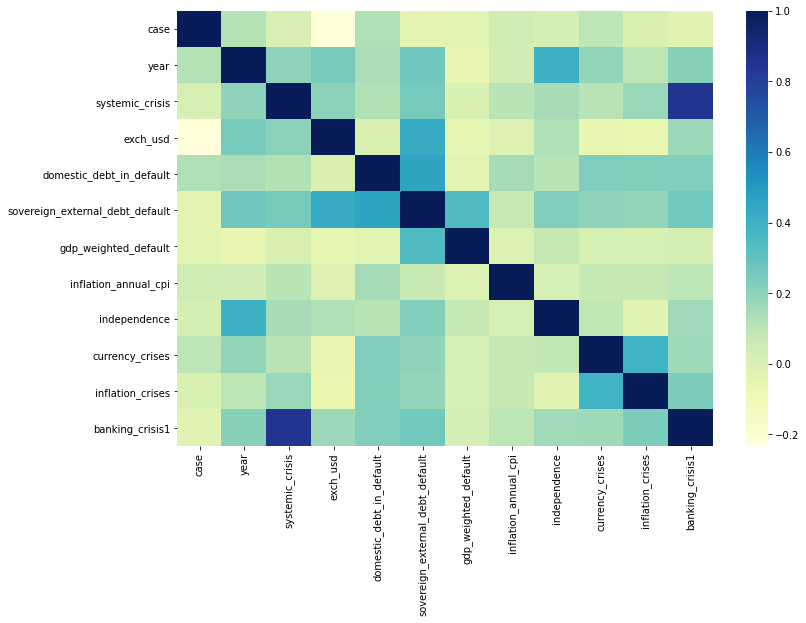

In [47]:
df_corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,cmap='YlGnBu')

##### Features'impact

In [48]:
df_corr['banking_crisis1'].sort_values(ascending=False)

banking_crisis1                    1.000000
systemic_crisis                    0.853702
sovereign_external_debt_default    0.263992
inflation_crises                   0.235852
domestic_debt_in_default           0.225797
year                               0.213774
exch_usd                           0.168775
currency_crises                    0.166859
independence                       0.159620
inflation_annual_cpi               0.098860
gdp_weighted_default               0.026545
case                              -0.023652
Name: banking_crisis1, dtype: float64

Systemic crisis is strongly correlated with banking crisis.This feature strongly impacts banking crisis'outcome. Features like case , gdp_weighted and inflation rate don't have much of an impact on banking crises. They can even be deleted. 
With these information ,we should be able to build a model with a fairly good accuracy.

## 2. DATA PREPROCESSING

Data preprocessing is an important step data analysis and in machine learning. Here, we transform data and make sure that it is ready to be interpreted by an algorithm.

### Missing values 

In [49]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
banking_crisis1                    0
dtype: int64

No missing values in this dataset. 

### Remove duplicate/unnecessary features or columns

In [50]:
#Make a copy of dataframe before any transformation
df_copy1 = df.copy()

#print all features 
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis',
       'banking_crisis1'],
      dtype='object')

In [51]:
#Analyse case , cc3
#feature_info('case') #return : 'A number which denotes a specifc country'
#feature_info('cc3')  #return : 'A 3-letter country code'


In [52]:
#Delete case, cc3 and duplicate banking_crisis
df = df.drop(['case','cc3','banking_crisis'], axis=1)
#columns deletion
df.columns

Index(['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis1'],
      dtype='object')

In [53]:
#Rename 'banking_crisis1' to banking_crisis
df = df.rename(columns={'banking_crisis1':'banking_crisis'})
df.columns

Index(['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

### Transform categorical variables into numerical

In [54]:
#Make another copy
df_copy2 = df.copy()

#List all non-numerical columns 
df.select_dtypes(['object']).columns 

Index(['country'], dtype='object')

There are many ways to transform features into a numerical forms[9]. Pandas'get_dummies() can do the job for us.

In [55]:
country_dummies = pd.get_dummies(df['country'])
country_dummies.head(2)

,Algeria,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0


In the new format, each country gets a column. The first 2 rows in our dataframe have 'Algeria' as the country. In the new format, values in the first 2 rows of column 'Algeria' will be '1'. The rest columns will have '0' value.

Now concatenante country_dummies with original dataset and delete 'country'.

In [56]:
#Concatenate the dfs
df = pd.concat([df,country_dummies],axis=1)
df = df.drop('country',axis=1)

#check df & columns
#df.head(5)
df.columns

Index(['year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis', 'Algeria', 'Angola',
       'Central African Republic', 'Egypt', 'Ivory Coast', 'Kenya',
       'Mauritius', 'Morocco', 'Nigeria', 'South Africa', 'Tunisia', 'Zambia',
       'Zimbabwe'],
      dtype='object')

In [57]:
# Something was odd with this column. Unknow value '2'
df['currency_crises'].value_counts()

0    923
1    132
2      4
Name: currency_crises, dtype: int64

In [58]:
#Replace value '2' with '1 'in 'currency_crises' column. We suppose it was a mistake!
#.Make another copy of df. Just in case!
df_copy2= df.copy()
df['currency_crises']=df['currency_crises'].apply(lambda x : 1 if x==2 else x)
df['currency_crises'].value_counts()

0    923
1    136
Name: currency_crises, dtype: int64

In [59]:
df.head(5)

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,...,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and testing dataset 

In [60]:
#Split training and testing dataset using train_test_split
X= df.drop('banking_crisis', axis=1)
y=df['banking_crisis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [61]:
y_test.value_counts()

0    293
1     25
Name: banking_crisis, dtype: int64

## 3. ML MODELS & EVALUATION

In [62]:
#define a dictionary to record models' accuracy
model_accuracy={}

### Logistic Regression

In [63]:
#create model
lr_model = LogisticRegression(max_iter=10000)
#fit & train
lr_model.fit(X_train,y_train)
#predict with test data
predictions_lr = lr_model.predict(X_test)
#Evaluate the model 
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {} ".format(
    confusion_matrix(y_test,predictions_lr),
    round(accuracy_score(y_test,predictions_lr),3)*100 ,
    classification_report(y_test,predictions_lr)))

Confusion matrix : 
 [[291   2]
 [  2  23]] 

Accuracy Score:98.7% 

Classification Report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.92      0.92        25

    accuracy                           0.99       318
   macro avg       0.96      0.96      0.96       318
weighted avg       0.99      0.99      0.99       318
 


In [64]:
#Save accuracy score in dict 
model_accuracy['Logistic_Regression']= round(accuracy_score(y_test,predictions_lr),3)*100

### Support Vector Machine

In [65]:
#create model 
svc_model = SVC()
#fit & train 
svc_model.fit(X_train,y_train)
#Predict with test data
predictions_svm = svc_model.predict(X_test)
#Evaluate the model
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_svm),
      round(accuracy_score(y_test,predictions_svm),3)*100 ,
      classification_report(y_test,predictions_svm)))


Confusion matrix : 
 [[293   0]
 [ 24   1]] 

Accuracy Score:92.5% 

Classification Report : 
                precision    recall  f1-score   support

           0       0.92      1.00      0.96       293
           1       1.00      0.04      0.08        25

    accuracy                           0.92       318
   macro avg       0.96      0.52      0.52       318
weighted avg       0.93      0.92      0.89       318



In [66]:
#Save accuracy score in dict 
model_accuracy['Support Vector Machine']= round(accuracy_score(y_test,predictions_svm),3)*100

### K-Nearest Neighbors

In [67]:
#create the model with k=1
knn_model = KNeighborsClassifier(n_neighbors=1)
#train&fit 
knn_model.fit(X_train,y_train)
#predict with test data
predictions_knn = knn_model.predict(X_test)
#Evaluate the model
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_knn),
      round(accuracy_score(y_test,predictions_knn),3)*100 ,
      classification_report(y_test,predictions_knn)))

Confusion matrix : 
 [[277  16]
 [ 11  14]] 

Accuracy Score:91.5% 

Classification Report : 
                precision    recall  f1-score   support

           0       0.96      0.95      0.95       293
           1       0.47      0.56      0.51        25

    accuracy                           0.92       318
   macro avg       0.71      0.75      0.73       318
weighted avg       0.92      0.92      0.92       318



 Choosing the right K is crucial in this algorithm. We are going to run this algo multiple times with various k. We will later plot the error rate to find out k that produces the least error. This is called the elbow method.

#### Tuning knn with the elbow method

Text(0, 0.5, 'Error Rate')

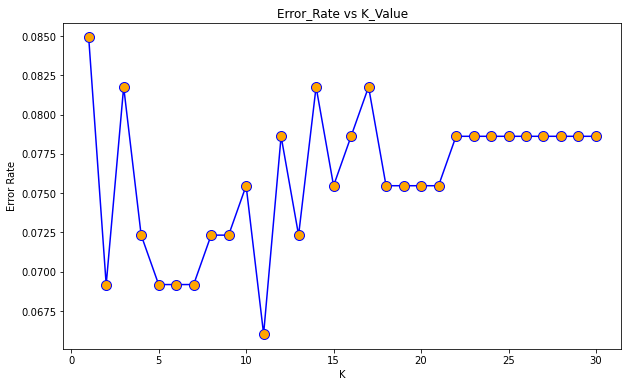

In [68]:
error_rate = []
# Up to 30 iterations 
for i in range(1,31):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_knn_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_knn_i != y_test))

#Plot the error vs k value
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color='blue', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error_Rate vs K_Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
#From previous graph, the least error is at k =11 . 
#Error rate difference btw k1&k11 +/- 1.5%.So the model acc won't improve much.
#Retrain model with k=11

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
predictions_knn_11 = knn.predict(X_test)
#Evaluate the model
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_knn_11),
      round(accuracy_score(y_test,predictions_knn_11),3)*100 ,
      classification_report(y_test,predictions_knn_11)))

Confusion matrix : 
 [[290   3]
 [ 18   7]] 

Accuracy Score:93.4% 

Classification Report : 
                precision    recall  f1-score   support

           0       0.94      0.99      0.97       293
           1       0.70      0.28      0.40        25

    accuracy                           0.93       318
   macro avg       0.82      0.63      0.68       318
weighted avg       0.92      0.93      0.92       318



 Well, we have improved the model by +/- 2% only!

In [70]:
#Save both accuracy scores 
model_accuracy['KNN']= round(accuracy_score(y_test,predictions_knn),3)*100
model_accuracy['KNN_tuned']= round(accuracy_score(y_test,predictions_knn_11),3)*100

### Decision Tree 

In [71]:
#create model
dt_model = DecisionTreeClassifier()
#Train & fit 
dt_model.fit(X_train,y_train)
#predict using test data
predictions_dt = dt_model.predict(X_test)
#Evaluate model
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_dt),
      round(accuracy_score(y_test,predictions_dt),3)*100 ,
      classification_report(y_test,predictions_dt)))


Confusion matrix : 
 [[289   4]
 [  1  24]] 

Accuracy Score:98.4% 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      0.99      0.99       293
           1       0.86      0.96      0.91        25

    accuracy                           0.98       318
   macro avg       0.93      0.97      0.95       318
weighted avg       0.99      0.98      0.98       318



In [72]:
#Save  accuracy score 
model_accuracy['Decision Tree']= round(accuracy_score(y_test,predictions_dt),3)*100

### Random Forest

In [73]:
#create
rf_model = RandomForestClassifier()
#fit & train
rf_model.fit(X_train,y_train)
#predict using test data
predictions_rf = rf_model.predict(X_test)
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_rf),
      round(accuracy_score(y_test,predictions_rf),3)*100 ,
      classification_report(y_test,predictions_rf)))

Confusion matrix : 
 [[290   3]
 [  1  24]] 

Accuracy Score:98.7% 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      0.99      0.99       293
           1       0.89      0.96      0.92        25

    accuracy                           0.99       318
   macro avg       0.94      0.97      0.96       318
weighted avg       0.99      0.99      0.99       318



In [74]:
#Save both accuracy scores 
model_accuracy['Random Forest']= round(accuracy_score(y_test,predictions_rf),3)*100

### Neural Network

In [75]:
#Scale/Normalize the input
#For more info about this , please read [10]
#create scaler
scaler = MinMaxScaler()

#scale both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#create a sequential model
model_nn = Sequential()

# hidden layer 1, specify input_dim ()
model_nn.add(Dense(46, activation='relu', input_dim=23))
# hidden layer 2
model_nn.add(Dense(23, activation='relu'))
# output layer
model_nn.add(Dense(units=1,activation='sigmoid'))

#compile
model_nn.compile(optimizer='adam',
            loss='binary_crossentropy', metrics=['accuracy'])

#print the model summary 
print(model_nn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                1104      
_________________________________________________________________
dense_1 (Dense)              (None, 23)                1081      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 24        
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
#Train the model 
#You can try various no of epochs to analyse the model
model_history=model_nn.fit(x=X_train_scaled,y=y_train, epochs=40,validation_data=(X_test_scaled, y_test))
model_history

Epoch 1/40
24/24 [==============================] - 0s 13ms/step - loss: 0.6539 - accuracy: 0.7301 - val_loss: 0.7235 - val_accuracy: 0.9214
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.9069 - val_loss: 0.7636 - val_accuracy: 0.9214
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.9069 - val_loss: 0.8387 - val_accuracy: 0.9214
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.9069 - val_loss: 0.8678 - val_accuracy: 0.9214
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.9069 - val_loss: 0.9079 - val_accuracy: 0.9214
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9069 - val_loss: 0.8816 - val_accuracy: 0.9214
Epoch 7/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9069 - val_loss: 0.8968 - val_accuracy: 0.9214
Epoch 8/40
24/24 [=

In [77]:
#save model 
model_nn.save('NN_40.h5') 

#predict using test data
predictions_nn = model_nn.predict_classes(X_test_scaled)

#Evaluate model
print("Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test,predictions_nn),
      round(accuracy_score(y_test,predictions_nn),3)*100 ,
      classification_report(y_test,predictions_nn)))


Confusion matrix : 
 [[293   0]
 [  1  24]] 

Accuracy Score:99.7% 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      0.96      0.98        25

    accuracy                           1.00       318
   macro avg       1.00      0.98      0.99       318
weighted avg       1.00      1.00      1.00       318



In [78]:
#Save accuracy acore 
model_accuracy['Neural Network']= round(accuracy_score(y_test,predictions_nn),3)*100

In [79]:
# Data available in history keys
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

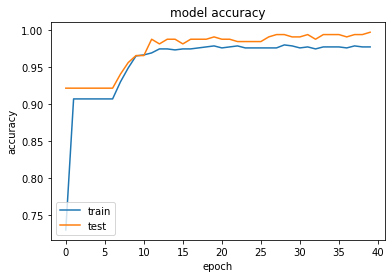

In [80]:
# Compare training & testing accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()


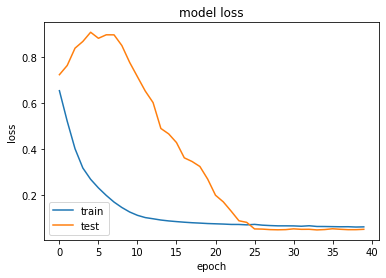

In [81]:
#Plot loss on training and validation dataset
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

## 4.CONCLUSION

### Top 5 important features

Text(0.5, 0, "Features' Importance (%)")

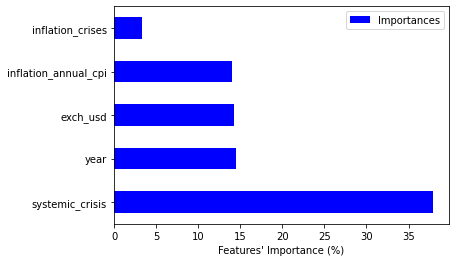

In [82]:
#top5 most important features 
#Find out top 5 most important features using random forest model
pd.DataFrame(data = rf_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = pd.DataFrame(X_train).columns).sort_values("Importances", ascending = False)[:5].plot(kind = "barh", color = "blue")

plt.xlabel("Features' Importance (%)")

### The best model 

In [83]:
#Compare all precisions 
pd.DataFrame.from_dict(model_accuracy,orient='index',columns=['Accuracy %']).sort_values(by='Accuracy %',ascending=False)

,Accuracy %
Neural Network,99.7
Logistic_Regression,98.7
Random Forest,98.7
Decision Tree,98.4
KNN_tuned,93.4
Support Vector Machine,92.5
KNN,91.5


Great.The overall accuracy of our models is tremendous However,accuracy should not be the only metric to determine the best model(s) especially when classes are imbalanced. Precision and recall are some others metrics to consider (they are found in the classification report of each the model). Knowing how we intend to use the model is therefore crucial in selecting the best model. A trade-off between these 2 metrics is often suitable.


 



### I want to thank you for reading my analysis. If you have any question or feedback, please do not hesitate to comment.
### Gracias !


1. https://courses.lumenlearning.com/boundless-economics/chapter/fundamentals-of-banking-crises/#:~:text=Banking%20crises%20are%20when%20there,only%20source%20of%20financial%20crises.
2. https://pgreenfinch.pagesperso-orange.fr/recupknol/k33e-systemiccrisisrisk.html#:~:text=A%20systemic%20crisis%20is%20a,with%20dire%20global%20economic%20consequences
3. https://en.wikipedia.org/wiki/Currency_crisis#:~:text=A%20currency%20crisis%20is%20a,in%20the%20foreign%20exchange%20market
4. https://www.investopedia.com/terms/c/consumerpriceindex.asp 
5. https://www.gfmag.com/global-data/economic-data/public-debt-percentage-gdp 
6. https://www.investopedia.com/terms/i/inflation.asp#:~:text=Inflation%20is%20a%20quantitative%20measure,it%20did%20in%20prior%20periods
7. https://datahelpdesk.worldbank.org/knowledgebase/articles/474124-what-is-external-debt
8. https://en.wikipedia.org/wiki/Internal_debt#:~:text=Internal%20debt%20or%20domestic%20debt,funds%20for%20the%20internal%20debts.
9. https://pbpython.com/categorical-encoding.html
10. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/#:~:text=Data%20scaling%20is%20a%20recommended,valued%20input%20and%20output%20variables
Additional sources :
+ Africa Economic Brief,volume 3 , Afdb. Link : https://www.afdb.org/fileadmin/uploads/afdb/Documents/Publications/African%20Systemic%20Financial%20Crises.pdf